<a href="https://colab.research.google.com/github/ua-datalab/NLP-Speech/blob/main/Introduction_to_Speech_Technology/Introduction_to_Speech_Technology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center>Introduction to Speech Technology</center></h1>

![](https://www.csail.mit.edu/sites/default/files/styles/primary_image/public/2017-12/ASR1_0.png)

## Housekeeping
1. Check that the recording is on
2. Check audio and screenshare
3. Share link to notebook in chat
4. Light mode and readable font size

# Overview
Speech technology includes processes and pipelines that record, encode, process and decode spoken human langauge for processes such as voice recognition, transcription, biometrics, speech synthesis and machine translation.

Speech processing, in association with NLP processes human language at multiple linguistic levels: from the phonetic and phonological, to the syntactic and cognitive.

With advancements in voice capturing interfaces, GPUs, and deep learning, speech technology can now process human conversations nealy in real-time, making communication with systems more accessible and natural.


# Popular Use Cases

## Speaker diarization and biometrics
Voice recognition assists in splitting audio with multiple speakers. It is also a tool for  voice identification

## Transcription and captioning, voice typing
With a language model, ASR can be used to turn the speech signal into text with a predictive element, often with very little lag.

## Sound source identification
We can identify speech, background noise, bird calls, music by processing sound files and looking for sounds of different nature

## Speech synthesis
New sounds and voices can be generated with user-specified parameters

## Voice assistants and voice-activated technology
Google, Amazon and other devices can control devices and perform tasks with a activation command and prompts

## Emotion, sentiment and voice recognition
By combining multiple linguistic levels using the speech mannerisms and the  contents of the dialog, we can do a much better job predicting/perceiving emotional state, sarcasm, and speaker intent.

## Machine translation and language detection
Every language has its own phonology, phonotactics, and linguistic elements. Speech offers a great way to use speech tchnology and NLP to differentiate langauges, and translate between them

How many of these have you encountered this week?

![](https://raw.githubusercontent.com/ua-datalab/NLP-Speech/main/Introduction_to_Speech_Technology/asr_pipeline.png)

# Speech Processing: terminology

1. Speech Recognition (ASR - Automatic Speech Recognition):
Converting spoken language into text by recognizing speech patterns and interpreting them into written language.
Ex. virtual assistants trained to understand user commands
2. Natural Language Processing (NLP): Enabling machines to understand, interpret, and generate human language
3. Speech Synthesis: artificial production of human speech by converting text into sound using algorithms and models.
4. Text-to-Speech (TTS): The process of taking written text as prompts, and outputting spoken words. Ex.: every Twitch streamer trying to read donation information while gaming.
5. Voice User Interface (VUI): The interface that allows users to use voice commands as input.
7. Acoustic Model: A (usually) probabalistic or deep neural network model trained to represent the relationship between linguistic units of speech and their audio signals
8. Language Model: A statistical model that predict the likelihood of word sequences based on prior language patterns.

10. Wake Word
Definition: A specific word or phrase used to activate a voice-controlled system, alerting it to start listening for further commands.
Use Case: In devices like Alexa, "Alexa" is the wake word that prompts the system to start processing voice commands.
Bonus Terms (Optional):
Dialog Manager: The system responsible for controlling the flow of conversation in a voice interaction, ensuring that responses are contextually appropriate.
Speech Corpus: A large collection of recorded speech data used to train speech recognition models and improve their accuracy.
Understanding and defining these terms will give your audience a solid foundation to grasp the technical aspects of speech technology.

# History of Speech Techology
![](https://miro.medium.com/v2/resize:fit:3456/format:webp/1*LtuOUuCSwAKh8Um7_NCHmA.png)

# The world's shorter phonetics + phonology primer



## Sound propagation
- Sound source
- [Longitudinal waves, compressions and rarefactions](https://www.physicsclassroom.com/class/sound/Lesson-1/Sound-as-a-Longitudinal-Wave)
- Medium
- Resonance tube

## Phonetics + Physics concepts worth understanding better:
- Amplitude: how much energy?
- Time: duration of the wave's propogation
- Frequency: how often does the wave occilate per unit time?
- Simple vs Complex waves: wave with only 1 frequency component, wave with only multiple frequency components
- Waveform: Plot of amplitude of the sound wave over time
- Spectrum: Plot of magnitude of each frequency component, or number of occilations of each component per second
- Spectrogram: Plot of changes in frequency components of the sound change over time
- Fourier Transform: A mathematical function that represents a wave in the frequency domain
- Formants: In a speech wave, resonance in the oral cavity amplifies some components of the wave, and dampens others. This causes a concentration of energy (higher amplitude) around a particular frequency in the speech wave. For human speech generates several formants, each at a different frequency ( ~one in every 1000Hz band for an average male voice, 1100Hz for average female voice).
- MFCCs: A the "short-term" power spectrum of sound, often captured every 5-20 miliseconds. They are collected by applying a series of transformations (like a mel-frequency scale) to extract a representation that is closer to that of human auditory processing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write
from scipy.signal import spectrogram
from google.colab import files

In [2]:
from IPython.display import Audio
# Generate time array
t = np.linspace(0, 1.0, int(1000 * 1.0), endpoint=False)

# Generate a tone (sine wave) at 5000Hz
tone = np.sin(2 * np.pi * 5000 * t)
Audio(tone, rate=1000)

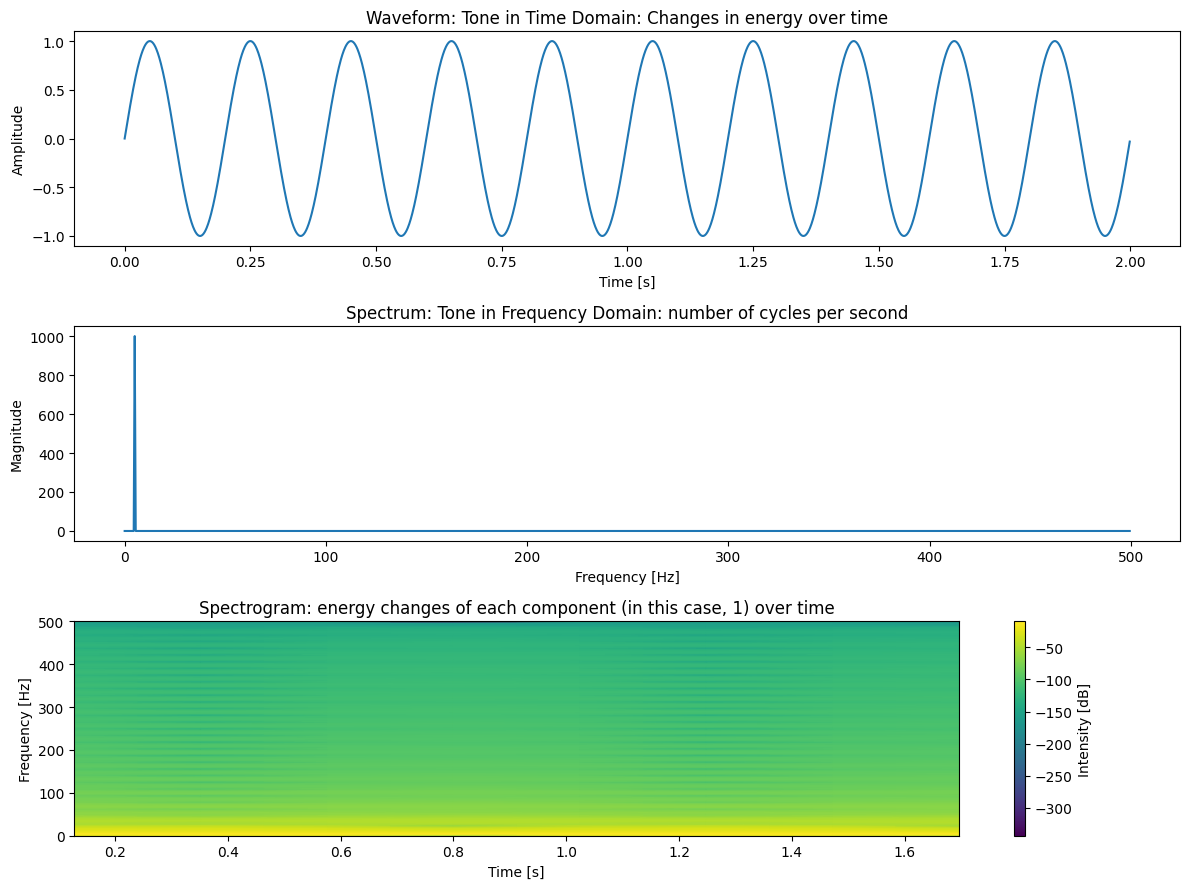

In [3]:

def visualize_tone_with_spectrogram(frequency, duration=1.0, sampling_rate=1000, filename='tone.wav'):
    # Generate time array
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate the tone (sine wave)
    tone = np.sin(2 * np.pi * frequency * t)
    Audio(tone, rate=1000)


    # Normalize tone to the range of int16 for saving as a .wav file

    # Perform the Fourier Transform to get the frequency spectrum
    N = len(tone)
    yf = fft(tone)
    xf = fftfreq(N, 1 / sampling_rate)

    # Only take the positive part of the frequency spectrum
    xf = xf[:N // 2]
    yf = np.abs(yf[:N // 2])

    # Calculate the spectrogram
    f, t_spec, Sxx = spectrogram(tone, fs=sampling_rate)

    # Plot the waveform, spectrum, and spectrogram
    plt.figure(figsize=(12, 9))

    # Time domain (waveform)
    plt.subplot(3, 1, 1)
    plt.plot(t, tone)
    plt.title("Waveform: Tone in Time Domain: Changes in energy over time")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")

    # Frequency domain (spectrum)
    plt.subplot(3, 1, 2)
    plt.plot(xf, yf)
    plt.title("Spectrum: Tone in Frequency Domain: number of cycles per second")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")

    # Spectrogram
    plt.subplot(3, 1, 3)
    plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title("Spectrogram: energy changes of each component (in this case, 1) over time")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time [s]")
    plt.colorbar(label='Intensity [dB]')

    plt.tight_layout()
    plt.show()

    # Save the tone as a .wav file
    # write(filename, sampling_rate, np.int16(tone * 32767))
    # print(f"Audio file saved as {filename}.")

    # Provide download link for the audio file
    # files.download(filename)

# Example usage
visualize_tone_with_spectrogram(frequency=5, duration=2.0, sampling_rate=1000, filename='tone.wav')


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write
import librosa
import librosa.display

def generate_vowel_sound(duration=1.0, sampling_rate=1000):
    """
    Generate a vowel-like sound with specific formants.
    The formants are represented as peaks in the frequency domain.
    """
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Frequencies for formants (F1, F2, F3)
    f1 = 700  # F1
    f2 = 1200  # F2
    f3 = 2800  # F3

    # Generate the vowel sound by adding formants
    wave = (0.5 * np.sin(2 * np.pi * f1 * t) +
            0.25 * np.sin(2 * np.pi * f2 * t) +
            0.125 * np.sin(2 * np.pi * f3 * t))

    # Normalize the wave
    wave = wave / np.max(np.abs(wave))

    return t, wave

def generate_noise_sound(duration=1.0, sampling_rate=1000):
    """
    Generate a noise sound without any formants.
    """
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate white noise
    wave = np.random.uniform(-1, 1, t.shape)

    # Normalize the wave
    wave = wave / np.max(np.abs(wave))

    return t, wave

def compute_mfcc(wave, sampling_rate=1000, n_mfcc=13, n_fft=256):
    """
    Compute MFCCs from the given wave.
    """
    mfccs = librosa.feature.mfcc(y=wave, sr=sampling_rate, n_mfcc=n_mfcc, n_fft=n_fft)
    return mfccs

def plot_mfccs(wave, sampling_rate=1000, title = "MFCCs", n_mfcc=13, n_fft=256):
    """
    Compute and plot MFCCs for the given wave.
    """
    # Compute MFCCs
    mfccs = compute_mfcc(wave, sampling_rate, n_mfcc, n_fft)

    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')
    plt.title(title)
    plt.colorbar(label='MFCC Coefficients')
    plt.xlabel('Time [s]')
    plt.ylabel('MFCC Coefficient Index')
    plt.tight_layout()
    plt.show()

def plot_waveform_and_spectrum(t, wave, sampling_rate=1000, title="Waveform and Spectrum"):
    """
    Plot waveform and frequency spectrum for the given wave.
    """
    # Perform Fourier Transform
    N = len(wave)
    yf = fft(wave)
    xf = fftfreq(N, 1 / sampling_rate)

    # Take the positive half of the spectrum
    xf = xf[:N // 2]
    yf = np.abs(yf[:N // 2])

    # Plotting
    plt.figure(figsize=(12, 5))

    # Waveform
    plt.subplot(1, 2, 1)
    plt.plot(t, wave)
    plt.title(f"{title} - Waveform")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")

    # Frequency spectrum
    plt.subplot(1, 2, 2)
    plt.plot(xf, yf)
    plt.title(f"{title} - Frequency Spectrum")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()

In [5]:
# Generate sounds
duration = 1.0  # Full duration of 1 second
sampling_rate = 1000

# Generate vowel sound with formants
t_vowel, wave_vowel = generate_vowel_sound(duration, sampling_rate)
write("vowel_sound.wav", sampling_rate, (wave_vowel * 32767).astype(np.int16))  # Save as .wav file

# Generate noise sound without formants
t_noise, wave_noise = generate_noise_sound(duration, sampling_rate)
write("noise_sound.wav", sampling_rate, (wave_noise * 32767).astype(np.int16))  # Save as .wav file



In [13]:
!pip install ffmpeg
!pip install pydub

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=b1d523e2e1e5dd79d1c9cc2648978f9d13862ca7fb61922e91287650749cfa9d
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [9]:
from pydub import AudioSegment
from pydub.playback import play
import wave

# Load and play the WAV file
audio = AudioSegment.from_wav("example.wav")
play(audio)


def read_audio(file_path):
    with wave.open(file_path, 'rb') as audio_file:
        params = audio_file.getparams()  # Get audio parameters
        frames = audio_file.readframes(params.nframes)  # Read audio frames
        return frames, params

### Repeating wave vs Noise

In [79]:
from IPython.display import Audio
import librosa

# Read audio file
vowel, sampling_rate = librosa.load("/content/vowel_sound.wav", sr=None)
Audio(vowel, rate=sampling_rate)

In [80]:
noise = read_audio("/content/noise_sound.wav").squeeze()
Audio(noise, rate=sampling_rate)

## Phonology/ Phonemic inventory, phonotactics, prosody

Now that we have understood how sound is produced, let us look at some specific components of human speech.
- Phones, phonemes: smallest unit of sound distinct from others, which can build bigger linguistic units.
- Prosody: the rhythm, stress, and intonation of speech, which can affect meaning and emotional tone. Prosody helps speech sound emotive, natural and varies by language.
- Phonology: Permissible and prohibitted sound patterns of a given language, building its inventory of possible sounds.
- Phonotactics: Srudy of combinations and arrangements of sounds (phonemes) in a particular language, governing the permissible structures of syllables and words.

### Constraints:
- Human speech is versatile. But with our articulatory system, we can only producea limited set of sounds, which overlap with each other
Below is a 'vocabulary' containing all phones we can create with our articulatory system.

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/IPA_chart_2020.svg" width="500"/>

- For speech to actually be useful, sounds have to be arranged in such a way that they can be differentiated, or else words will sound the same.
- Human language is purpose-driven, works with all linguistic levels (unless you are really angry, sad or heard a great joke).


*So speech processing is NOT sound processing, but language processing*

## Human Articulatory, Acoustic and Perception Systems:

### Articulation AKA the "ling" in linguistics
- Vocal folds (source)
- Oral and nasal cavities (resonance tubes)
- Articulators: tongue, teeth, palettes, velum

[The Pink Trombone Demo](https://dood.al/pinktrombone/)

### Acoustics
- Ear
- Ear membrane
[Interactive ear demo](https://www.amplifon.com/uk/interactive-ear/index.html)

### Perception
Taking a continuous sound stream, identifying speaker characteristics, splitting it down to phones, and processing speech along with visual and linguistic processing.


In [14]:
from IPython.display import HTML

video_id = "KiuO_Z2_AD4"
video_url = f"https://www.youtube.com/embed/{video_id}"

# Create an HTML iframe to embed the video
HTML(f"""
<iframe width="560" height="315" src="{video_url}" frameborder="0" allowfullscreen></iframe>
""")


## Things I can't cover today, but want to

Converting a speech signal into something that can be stored, transmitted and made machine-readable requires some additional steps and terminology:

- Analog vs digital signals
- Digital Signal Processing
- Digitization
- Sampling (and sampling rate)
- Quantization
- Setting the bitrate
- Compression

At the end of this process, we have sound in a format, that can be shared, stored, and processed in the pipeline.

The sound files can be in a whole host of formats (`.mp3, .flac, .wav, mp4a`, etc.). Command line tools such as `ffmpeg` allow us to transform sound files across formats, and change their parameters so that they can be fed into different pipelines easily.

**Now that we have covered the human side of speech technology, let us move to some terms on the machine side of the equation.**

# Demos

## Text to Speech with Coqui

[Code Source](https://github.com/ua-datalab/Generative-AI/blob/enoriega/langchain/Notebooks/HuggingFace_Multi_Modal.ipynb)

In [70]:
!pip install TTS
!pip install torch


  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
das

In [26]:
!pip install --upgrade numpy
!pip install --upgrade pandas

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gruut 2.2.3 requires numpy<2.0.0,>=1.19.0, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompat

In [71]:
# Import speech to text models and an interface using Coqui
import torch
from pprint import pprint
from TTS.api import TTS
from TTS.utils.radam import RAdam # Import the custom optimizer

# Get device
device = "cuda" if torch.cuda.is_available() else "cpu"

# List available 🐸TTS models
pprint(TTS().list_models())



In [76]:
from TTS.utils.manage import ModelManager

# Create a ModelManager instance
model_manager = ModelManager()

# Get the list of available models
models = model_manager.list_models()

# Print the models
for model in models:
    print(model)


 Name format: type/language/dataset/model
 1: tts_models/multilingual/multi-dataset/xtts_v2
 2: tts_models/multilingual/multi-dataset/xtts_v1.1
 3: tts_models/multilingual/multi-dataset/your_tts [already downloaded]
 4: tts_models/multilingual/multi-dataset/bark
 5: tts_models/bg/cv/vits
 6: tts_models/cs/cv/vits
 7: tts_models/da/cv/vits
 8: tts_models/et/cv/vits
 9: tts_models/ga/cv/vits
 10: tts_models/en/ek1/tacotron2
 11: tts_models/en/ljspeech/tacotron2-DDC
 12: tts_models/en/ljspeech/tacotron2-DDC_ph
 13: tts_models/en/ljspeech/glow-tts
 14: tts_models/en/ljspeech/speedy-speech
 15: tts_models/en/ljspeech/tacotron2-DCA
 16: tts_models/en/ljspeech/vits
 17: tts_models/en/ljspeech/vits--neon
 18: tts_models/en/ljspeech/fast_pitch
 19: tts_models/en/ljspeech/overflow
 20: tts_models/en/ljspeech/neural_hmm
 21: tts_models/en/vctk/vits
 22: tts_models/en/vctk/fast_pitch
 23: tts_models/en/sam/tacotron-DDC
 24: tts_models/en/blizzard2013/capacitron-t2-c50
 25: tts_models/en/blizzard2

In [29]:
# Loading a multilingual model
tts = TTS("tts_models/multilingual/multi-dataset/your_tts")

 > tts_models/multilingual/multi-dataset/your_tts is already downloaded.
 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > Model fully restored. 
 > Setting up Audio Processor...
 | > sample_rate:16000
 | > resample:False
 | > num_mels:64
 | > log_func:np.log10
 | > min_level_db:-

In [20]:
!wget -O sample.m4a https://github.com/ua-datalab/Generative-AI/raw/refs/heads/enoriega/langchain/Notebooks/sample.m4a

tts.tts_to_file("This is voice cloning.", speaker_wav="sample.m4a", language="en", file_path="output.wav")

display(Audio('output.wav', autoplay=True))

--2025-03-20 18:00:09--  https://github.com/ua-datalab/Generative-AI/raw/refs/heads/enoriega/langchain/Notebooks/sample.m4a
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ua-datalab/Generative-AI/refs/heads/enoriega/langchain/Notebooks/sample.m4a [following]
--2025-03-20 18:00:09--  https://raw.githubusercontent.com/ua-datalab/Generative-AI/refs/heads/enoriega/langchain/Notebooks/sample.m4a
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178997 (175K) [audio/mp4]
Saving to: ‘sample.m4a’

sample.m4a          100%[===================>] 174.80K  --.-KB/s    in 0.02s   

2025-03-20 18:00:10 (7.43 M

/usr/local/lib/python3.11/dist-packages/TTS/utils/audio/numpy_transforms.py:423: UserWarning: PySoundFile failed. Trying audioread instead.
  x, _ = librosa.load(filename, sr=sample_rate)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


 > Processing time: 4.65772557258606
 > Real-time factor: 2.644932182047734


## Noise reduction with Speech Brain

An open-source and all-in-one conversational AI toolkit based on PyTorch.

Code source: https://colab.research.google.com/github/speechbrain/speechbrain/blob/develop/docs/tutorials/basics/what-can-i-do-with-speechbrain.ipynb#scrollTo=PuVNyffAhVfx

In [22]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH


In [23]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


In [33]:
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio
!wget -O example_whamr.wav "https://www.dropbox.com/scl/fi/gxbtbf3c3hxr0y9dbf0nw/example_whamr.wav?rlkey=1wt5d49kjl36h0zypwrmsy8nz&dl=1"

model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement4')
enhanced_speech = model.separate_file(path='/content/example_whamr.wav')


--2025-03-20 18:09:04--  https://www.dropbox.com/scl/fi/gxbtbf3c3hxr0y9dbf0nw/example_whamr.wav?rlkey=1wt5d49kjl36h0zypwrmsy8nz&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4006ece0506e7e96b1a29a2b23.dl.dropboxusercontent.com/cd/0/inline/CmNBoYXT2MmnFTCcRNw_i_0AXwQpCg5gTKTeIFnlclXZA4yWDr4EnzgmNPeyVxY5Uco3QM8a9oDFvutZQvahVHFJgx49iF28DTVIay6AwWS_deOBk19wpEcbfFePShe9STW-r_5UlxskZiNnMjGz1lSb/file?dl=1# [following]
--2025-03-20 18:09:05--  https://uc4006ece0506e7e96b1a29a2b23.dl.dropboxusercontent.com/cd/0/inline/CmNBoYXT2MmnFTCcRNw_i_0AXwQpCg5gTKTeIFnlclXZA4yWDr4EnzgmNPeyVxY5Uco3QM8a9oDFvutZQvahVHFJgx49iF28DTVIay6AwWS_deOBk19wpEcbfFePShe9STW-r_5UlxskZiNnMjGz1lSb/file?dl=1
Resolving uc4006ece0506e7e96b1a29a2b23.dl.dropboxusercontent.com (uc4006ece0506e7e96b1a29a2b23.dl.dropboxusercontent.com)... 

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/pretrained_models/sepformer-whamr-enhancement4/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr-enhancement' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/sepformer-whamr-enhancement4.
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr-enhancement' if not cached


encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-whamr-enhancement/snapshots/ffdc70a9224a444dd99ce338f2e0a1c092c87ac5/encoder.ckpt' -> '/content/pretrained_models/sepformer-whamr-enhancement4/encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["encoder"] = /content/pretrained_models/sepformer-whamr-enhancement4/encoder.ckpt
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr-enhancement' if not cached


masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-whamr-enhancement/snapshots/ffdc70a9224a444dd99ce338f2e0a1c092c87ac5/masknet.ckpt' -> '/content/pretrained_models/sepformer-whamr-enhancement4/masknet.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["masknet"] = /content/pretrained_models/sepformer-whamr-enhancement4/masknet.ckpt
INFO:speechbrain.utils.fetching:Fetch decoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-whamr-enhancement' if not cached


decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-whamr-enhancement/snapshots/ffdc70a9224a444dd99ce338f2e0a1c092c87ac5/decoder.ckpt' -> '/content/pretrained_models/sepformer-whamr-enhancement4/decoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["decoder"] = /content/pretrained_models/sepformer-whamr-enhancement4/decoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: encoder, masknet, decoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): encoder -> /content/pretrained_models/sepformer-whamr-enhancement4/encoder.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): masknet -> /content/pretrained_models/sepformer-whamr-enhancement4/masknet.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): decoder -> /content/pretrained_models/sepformer-w

In [34]:
signal = read_audio("/content/example_whamr.wav").squeeze()
Audio(signal, rate=8000)

In [35]:
Audio(enhanced_speech[:, :].detach().cpu().squeeze(), rate=8000)

## Speech separation with Speech Brain


In [36]:
from speechbrain.inference.separation import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
!wget -O test_mixture.wav "https://www.dropbox.com/scl/fi/4327g66ajs8aq3dck0fzn/test_mixture.wav?rlkey=bjdcw3msxw3armpelxuayug5i&dl=1"
est_sources = model.separate_file(path='/content/test_mixture.wav')

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/hyperparams.yaml' -> '/content/pretrained_models/sepformer-wsj02mix/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/sepformer-wsj02mix.
INFO:speechbrain.utils.fetching:Fetch masknet.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/masknet.ckpt' -> '/content/pretrained_models/sepformer-wsj02mix/masknet.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["masknet"] = /content/pretrained_models/sepformer-wsj02mix/masknet.ckpt
INFO:speechbrain.utils.fetching:Fetch encoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/encoder.ckpt' -> '/content/pretrained_models/sepformer-wsj02mix/encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["encoder"] = /content/pretrained_models/sepformer-wsj02mix/encoder.ckpt
INFO:speechbrain.utils.fetching:Fetch decoder.ckpt: Fetching from HuggingFace Hub 'speechbrain/sepformer-wsj02mix' if not cached


decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--sepformer-wsj02mix/snapshots/3a2826343a10e2d2e8a75f79aeab5ff3a2473531/decoder.ckpt' -> '/content/pretrained_models/sepformer-wsj02mix/decoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["decoder"] = /content/pretrained_models/sepformer-wsj02mix/decoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: masknet, encoder, decoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): masknet -> /content/pretrained_models/sepformer-wsj02mix/masknet.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): encoder -> /content/pretrained_models/sepformer-wsj02mix/encoder.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): decoder -> /content/pretrained_models/sepformer-wsj02mix/decoder.ckpt


--2025-03-20 18:09:42--  https://www.dropbox.com/scl/fi/4327g66ajs8aq3dck0fzn/test_mixture.wav?rlkey=bjdcw3msxw3armpelxuayug5i&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8bf0f87d859d25b1a800893bae.dl.dropboxusercontent.com/cd/0/inline/CmP_XvgPZvoWLZ-KEXaxoAmkZ0vcYUdd27HzlyGhFeF8uHNbIWLlhFq1EUb9Lv0WYOJt5b0aYI55yJU6FmX67D2sxYyFcEr9orcov1F2OTFg13osJ9fD8t2wCyRtABNJNftOSVUi5_EImzzUefkXVTWY/file?dl=1# [following]
--2025-03-20 18:09:43--  https://uc8bf0f87d859d25b1a800893bae.dl.dropboxusercontent.com/cd/0/inline/CmP_XvgPZvoWLZ-KEXaxoAmkZ0vcYUdd27HzlyGhFeF8uHNbIWLlhFq1EUb9Lv0WYOJt5b0aYI55yJU6FmX67D2sxYyFcEr9orcov1F2OTFg13osJ9fD8t2wCyRtABNJNftOSVUi5_EImzzUefkXVTWY/file?dl=1
Resolving uc8bf0f87d859d25b1a800893bae.dl.dropboxusercontent.com (uc8bf0f87d859d25b1a800893bae.dl.dropboxusercontent.com)...

In [37]:
signal = read_audio("/content/test_mixture.wav").squeeze()
Audio(signal, rate=8000)

In [38]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [39]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

## Speaker Verification
The task here is to determine whether two sentences belong to the same speaker or not.

In [55]:
!wget -O example1.wav "https://www.dropbox.com/scl/fi/mu1tdejny4cbgxczwm944/example1.wav?rlkey=8pi7hjz15syvav80u1xzfbfhn&dl=1"
!wget -O example2.flac "https://www.dropbox.com/scl/fi/k9ouk6ec1q1fkevamodrn/example2.flac?rlkey=vtbyc6bzp9hknzvn9rb63z3yf&dl=1"

from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("/content/example1.wav", "/content/example2.flac")

--2025-03-20 18:19:01--  https://www.dropbox.com/scl/fi/mu1tdejny4cbgxczwm944/example1.wav?rlkey=8pi7hjz15syvav80u1xzfbfhn&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc27c7e75d4be540f5534a118d7e.dl.dropboxusercontent.com/cd/0/inline/CmPDWgMWxevp6CthSsvZl6fiOYvzYlWKHHkpBmbGmeWu1mWzC_f2if8k4gY3lAIgfKs6IWPJVEanPtkI77igfPTHXuwqJ0_RQINWrEVm42b01fBB9LB8tDJ3dd0GmMCVnkPAkPx6ehD4lUmB8hWK3PM1/file?dl=1# [following]
--2025-03-20 18:19:02--  https://uc27c7e75d4be540f5534a118d7e.dl.dropboxusercontent.com/cd/0/inline/CmPDWgMWxevp6CthSsvZl6fiOYvzYlWKHHkpBmbGmeWu1mWzC_f2if8k4gY3lAIgfKs6IWPJVEanPtkI77igfPTHXuwqJ0_RQINWrEVm42b01fBB9LB8tDJ3dd0GmMCVnkPAkPx6ehD4lUmB8hWK3PM1/file?dl=1
Resolving uc27c7e75d4be540f5534a118d7e.dl.dropboxusercontent.com (uc27c7e75d4be540f5534a118d7e.dl.dropboxusercontent.com)... 162.

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in pretrained_models/spkrec-ecapa-voxceleb.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /content/pretrained_models/spkrec-ecapa-voxceleb/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Using symlink found at '/content/pretrained_models/spkrec-ecapa-voxceleb/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /content/pretraine

In [56]:
signal = read_audio("/content/example1.wav").squeeze()
Audio(signal, rate=16000)

In [57]:
signal = read_audio("/content/example2.flac").squeeze()
Audio(signal, rate=16000)

In [59]:
print(f"prediction: {prediction[0]}, score: {score[0]}")

prediction: False, score: 0.17990164458751678


# References, games, demos

- [An Easy Introduction to Speech AI](https://developer.nvidia.com/blog/an-easy-introduction-to-speech-ai/)
- [Speech Brain Documentation](https://speechbrain.readthedocs.io/en/latest/API/speechbrain.html)
- [Speech Brain Tutorial](https://colab.research.google.com/github/speechbrain/speechbrain/blob/develop/docs/tutorials/basics/what-can-i-do-with-speechbrain.ipynb#scrollTo=eto6x24aKo7e)
- [Building a speaker recognition model](https://domino.ai/blog/building-a-speaker-recognition-model)
- [Speech Recognition Technology: The Past, Present, and Future](https://medium.com/swlh/the-past-present-and-future-of-speech-recognition-technology-cf13c179aaf)
- [Speech Technology: Theory and Applications](https://link.springer.com/book/10.1007/978-0-387-73819-2)
- [Hidden Markov Models](https://web.stanford.edu/~jurafsky/slp3/16.pdf)
- [Phonetics](https://web.stanford.edu/~jurafsky/slp3/H.pdf)
- [Automatic Speech Recognition and Text to Speech](https://web.stanford.edu/~jurafsky/slp3/A.pdf)
- [Gramle- spectrogram-based Wordle](https://nascl.rc.nau.edu/gramle/)
